In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_tweets.csv')

In [3]:
df.head()

,Unnamed: 0,sentiment,text
0,0,0,awww that s a bummer you shoulda got david car...
1,1,0,is upset that he can not update his facebook b...
2,2,0,i dived many times for the ball managed to sav...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,no it s not behaving at all i m mad why am i h...


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [5]:
df.describe()

,sentiment
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1600000 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [7]:
df[df['text'].isnull()].count()

sentiment    3286
text            0
dtype: int64

In [8]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']
df2 = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, names=cols)

In [9]:
df2.iloc[df[df['text'].isnull()].index].head()

,sentiment,id,date,query_string,user,text
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm
1011,0,1468061127,Mon Apr 06 23:30:23 PDT 2009,NO_QUERY,gabysslave,@citizensheep


Hence, because of data cleaning, some tweets now have NULL values. This is because those tweets comprised only of mentions or url links. Hence, these Null values must be dropped.

In [10]:
df.dropna(inplace=True)

In [11]:
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596714 entries, 0 to 1599999
Data columns (total 2 columns):
sentiment    1596714 non-null int64
text         1596714 non-null object
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


# Text Visualisation

### Word Cloud

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords=stopwords, 
                      max_font_size=40, random_state=42).generate(str(df['text']))

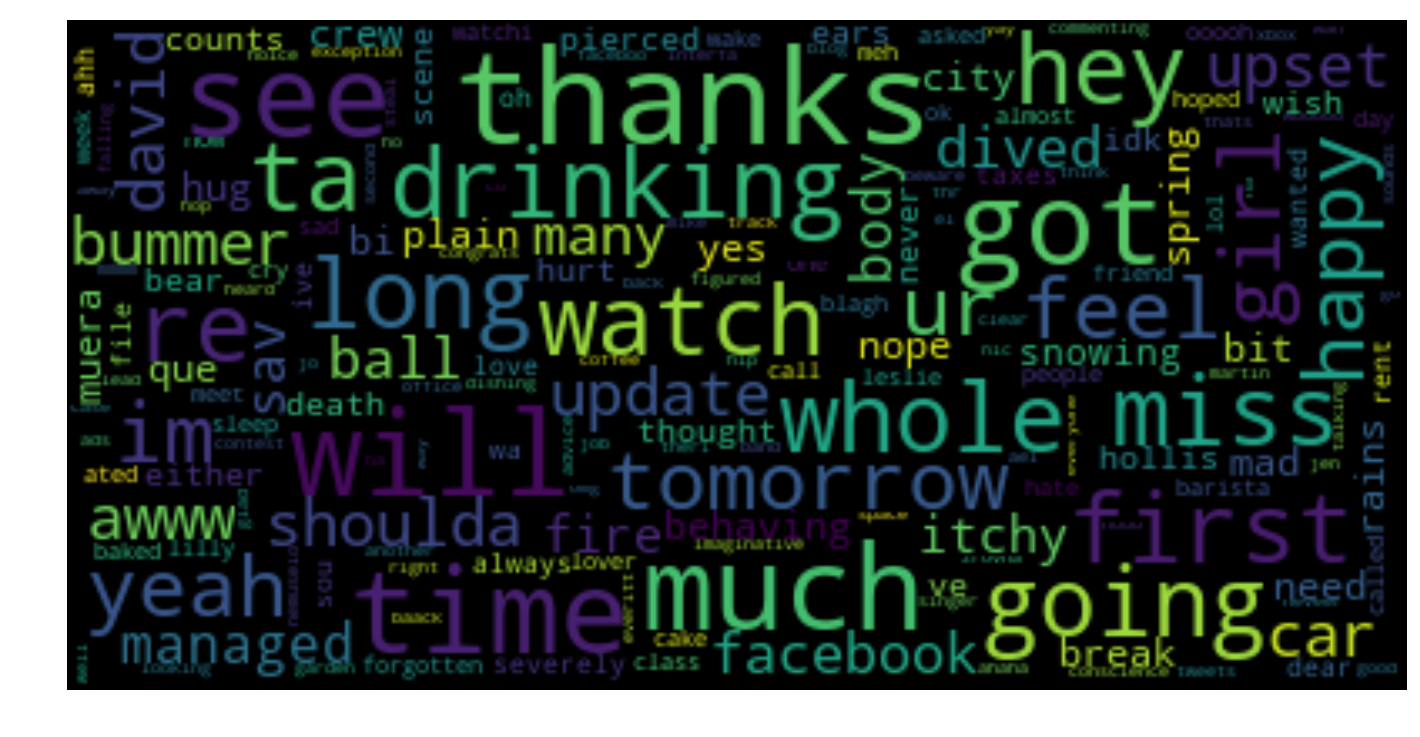

In [16]:
fig = plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud consists of the words which have the highest frequency among all the tweets, positive and negative both.

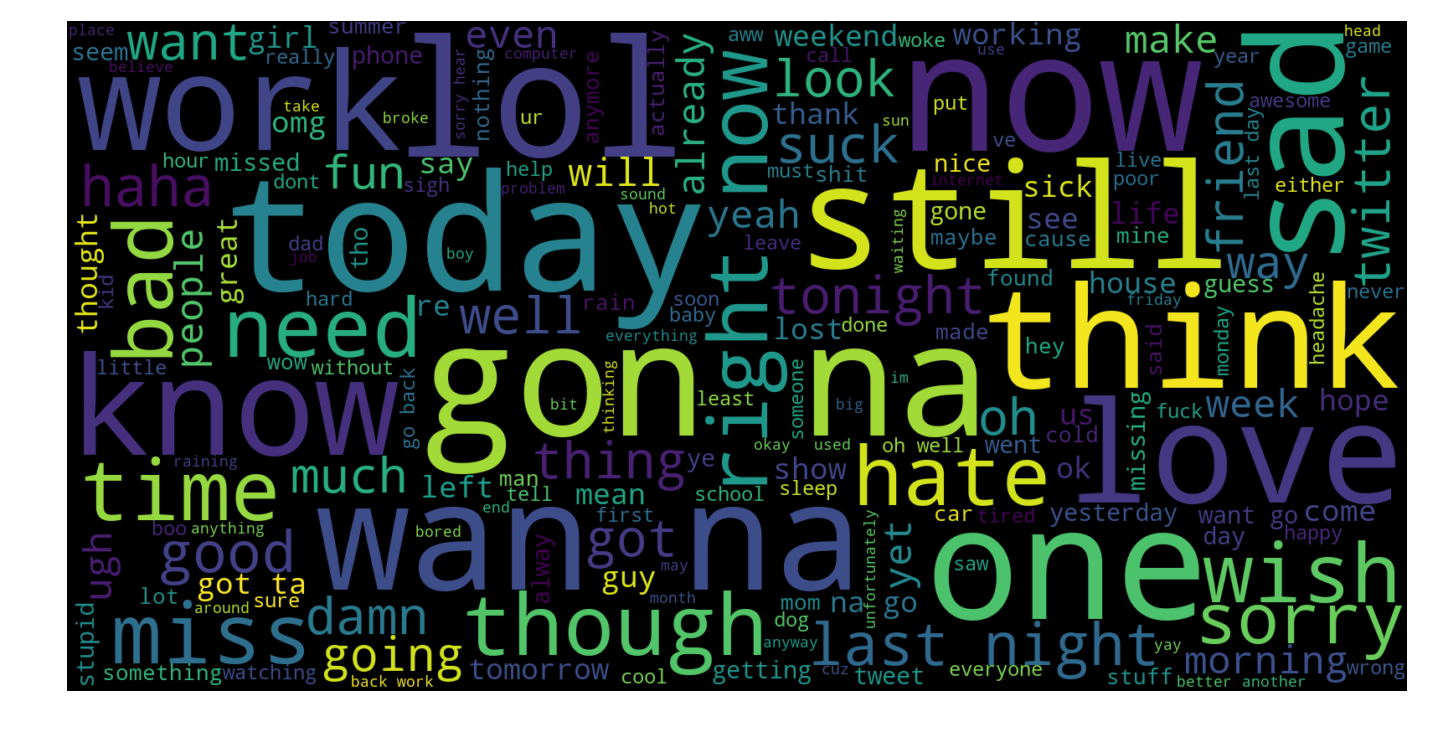

In [17]:
negative_tweets = df[df['sentiment']==0]

neg_tweet = []
for tweet in negative_tweets.text:
    neg_tweet.append(tweet)
neg_tweet = pd.Series(neg_tweet).str.cat(sep = ' ')

neg_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_tweet)
plt.figure(figsize=(12,10))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some words, like, "today", "one", "still" can be termed as neutral. Words like, "sad", "bad", "hate", "suck", "wish" etc. make sense as negative words.

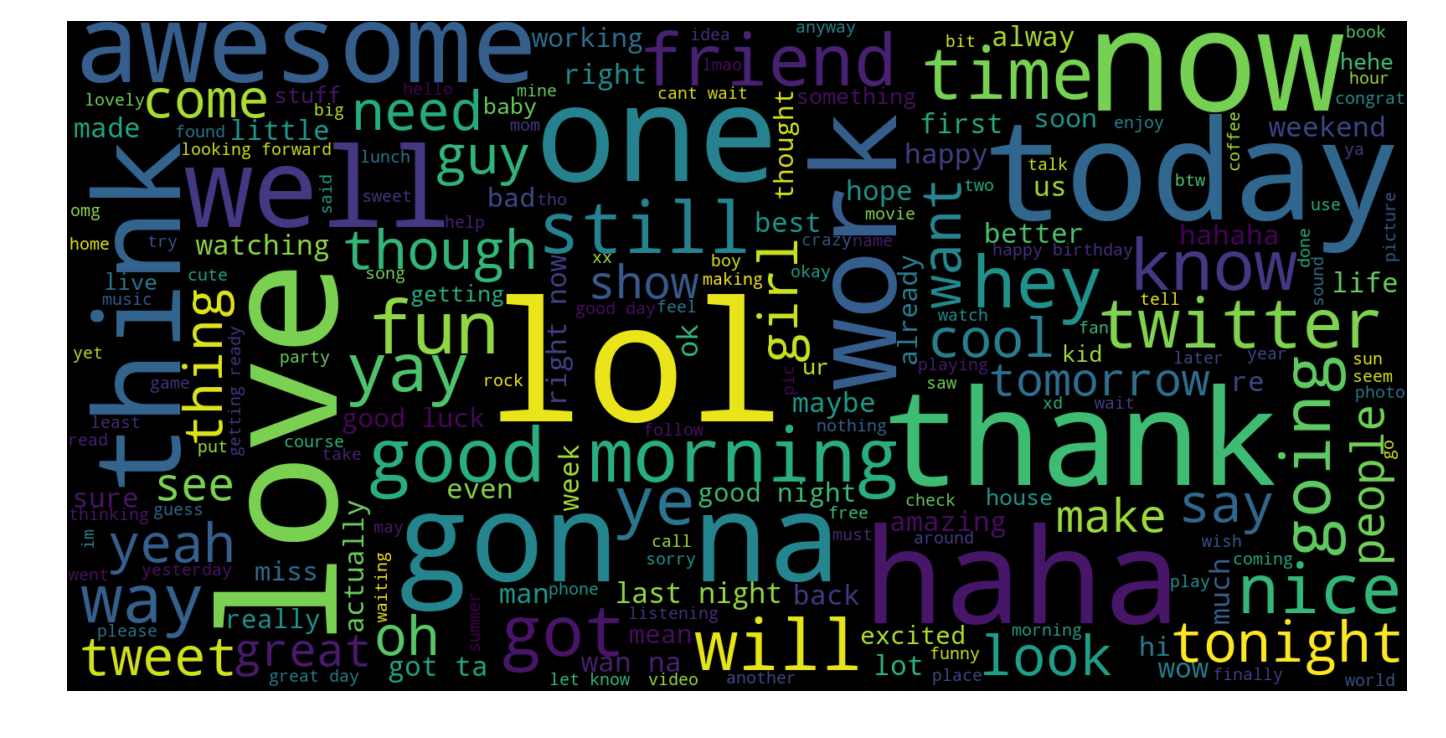

In [18]:
positive_tweets = df[df['sentiment']==1]

pos_tweet = []
for tweet in positive_tweets.text:
    pos_tweet.append(tweet)
pos_tweet = pd.Series(pos_tweet).str.cat(sep = ' ')

pos_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_tweet)
plt.figure(figsize=(12,10))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In this wordcloud of positive tweets, neutral words, like "today", "tonight", "still", etc are present. Also, words like "thank", "haha", "awesome", "good", etc stand out as the positive words.

Words like "today", "lol", "tonight", "still", "work" etc are common in both the positive and negative tweets. Hence, it can be concluded that people have both positive and negative response towards work and their day.

What I found surprising is the presence of "lol" and "love" in both the positive and the negative tweets wordclouds. So, now, I am going to inspect this.

In [19]:
count = 0
for tweet in negative_tweets.text:
    if 'love' in tweet:
        if count<50:
            print(tweet)
        count = count + 1

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe i love you too am here i miss you
damn the grind is inspirational and saddening at the same time do not want you to stop cuz i like what u do much love
i m missing you babe but as long as your alive i m happy ya i m tired my love imma try to sleep hopefully you had a headstart
love the french i tell people here in the south i m qtr french and they snarl at me french are beautiful people
ooh i m excited and not even going be there long love youtube
i m here friend and i love you
i wish i was sold out if you have some time let me know i would love to hear more about what you are up to
i love you buck
is in love with scrappy and is missin him already
glad i was able help you feel better i hate to see you sick love you
i love my atekinzz so much i soo miss her
stupid arranged marriages i ll convert so you can marry me love you
fuck omg austins always there tho

In [20]:
count

21548

Hence, there are 21.5k negative tweets where the word 'love' is used. But one thing I observed is that love is used with negative words like sad, loss, no, leave, etc or it is used sarcastically.

In [21]:
count = 0
for tweet in positive_tweets.text:
    if 'lol' in tweet:
        if count<50:
            print(tweet)
        count = count + 1

make sure you dm me if you post a link to that video lol so i do not miss it better get permission and blessing first
yayyy lol i just requested herrr what did she say
they are so serious too while singing like whoa hehe lsd maybe j k lolol
my brother is sick too lol quite weird
am i the first one to tell you you tweet the most while drinking lol
lol you re so fucking funny
im getting nervous that this trip tomorrow may be a little boring haha oh well i always have my trusty ipod and my books of course lol
one sixty six in bowling holy shit lol
just got home from school meant to be getting my hair cut but i cbf lol dancing soon
lol you counted times yeah it was a drag today was not sure if my tweets were going out seems to behave now though
heyyyyyy want to hook it up lol
lol esp when your updates hit my phone
lol not yet my brutha from anotha mutha
hum nice lol take something lol yeah party over there haha u kno them drunk ass s will i b seeing you janets party
if you are at paragon p

In [23]:
count

35780

In [24]:
count = 0
for tweet in negative_tweets.text:
    if 'lol' in tweet:
        if count<50:
            print(tweet)
        count = count + 1

hey long time no see yes rains a bit only a bit lol i m fine thanks how s you
ooooh lol that leslie and ok i will not do it again so leslie will not get mad again
lol wish they understood daylight savings has ended though and breakfast is an hour later they keep waking the kids up too
i was serious lol
i m goin to follow u since u did not lol go angels
lol they are some emotional ass men omg all this late night eating both of us are broke
im sorry i got you sick lol going to bed too night
lol nope but i did have complete camerafail
please tell me that s somewhere close to california lol
lol i kant believe cam got beat upp sooo embarasssiiiin
brian do not make me fuck u up lol i replied ur message did u get my i miss u
lauren is being stubborn she loves you you love her i feel so bad for you though it made me cry lol
ohh omg lmao i m crying right now lol kutnerrrr was the best
this is true lol but it s still a slap in the face after such a warm end of march
yea ma naaaaaaaaaaaaaaaaaaaam

In [25]:
count

22754

Now, I inspected the use of 'lol' in tweets of both, positive and negative sentiments. In positive tweets, lol is used as an expression for joy, fun and laughter. And in negative tweets, 'lol' is used with words that convey negative emotion like 'sad', 'crying', 'slap', 'no', 'bored' etc. 

## Preparing the text for data visualisation using CountVectorizer

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vect = CountVectorizer()

In [28]:
vect.fit(df.text)
#Tokenise and build vocab

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
len(vect.get_feature_names())

271306

Hence, the corpus consists of 271306 different words.

In [30]:
#Encode document
neg_matrix = vect.transform(df[df.sentiment==0].text)
pos_matrix = vect.transform(df[df.sentiment==1].text)

In [31]:
neg_tf = np.sum(neg_matrix, axis=0)
pos_tf = np.sum(pos_matrix, axis=0)

In [32]:
#Remove single-dimensional entries from the shape of an array
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [33]:
term_freq_df = pd.DataFrame([neg, pos], columns = vect.get_feature_names()).transpose()

In [34]:
term_freq_df.head()

,0,1
aa,168,97
aaa,97,55
aaaa,45,29
aaaaa,26,12
aaaaaa,16,12


In [35]:
term_freq_df.columns = ['negative', 'positive']

In [36]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

In [37]:
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,positive,total
to,313185,252600,565785
the,257953,266161,524114
my,190805,125981,316786
it,157491,147841,305332
and,153985,149692,303677
you,103865,198274,302139
not,196637,87771,284408
is,133533,111325,244858
in,115628,101297,216925
for,99044,117389,216433


Hence, after calculating the term frequency data, we find that the most frequent words are the stopwords.